<a href="https://colab.research.google.com/github/victory2588/Machine-Learning/blob/main/yolo_%EB%AC%BC%EC%B2%B4_%EA%B2%80%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2022-10-24 07:51:07--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  42.1MB/s    in 5.9s    

2022-10-24 07:51:13 (40.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
import numpy as np
import cv2

classes=[]
f=open('coco_names.txt','r')
classes=[line.strip() for line in f.readlines()]
colors=np.random.uniform(0,255,size=(len(classes),3))

img=cv2.imread('yolo_test.jpg')
height,width,channels=img.shape
blob=cv2.dnn.blobFromImage(img,1.0/256,(448,448),(0,0,0),swapRB=True,crop=False)

yolo_model=cv2.dnn.readNet('yolov3.weights','yolov3.cfg')
layer_names=yolo_model.getLayerNames()
out_layers=[layer_names[i-1] for i in yolo_model.getUnconnectedOutLayers()]

yolo_model.setInput(blob)
output3=yolo_model.forward(out_layers)
class_ids,confidences,boxes=[],[],[]

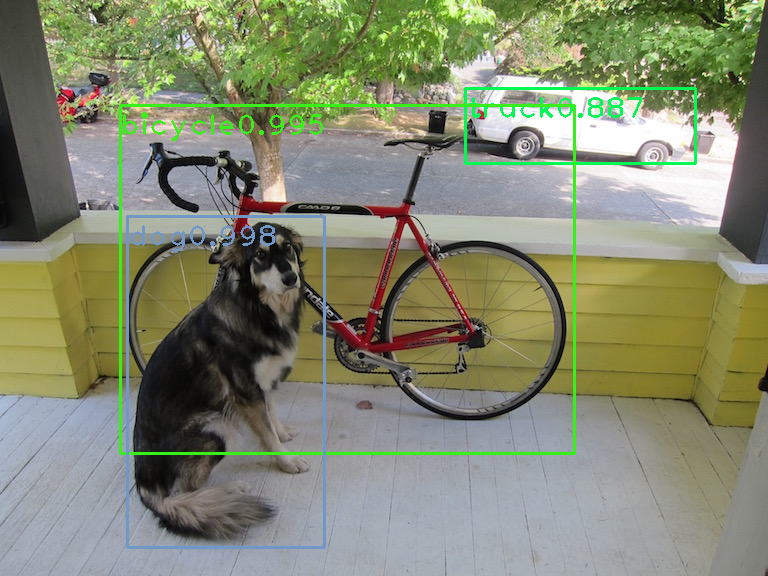

In [ ]:
for output in output3:
  for vec85 in output:
    scores=vec85[5:]
    class_id=np.argmax(scores)
    confidence=scores[class_id]
    if confidence>0.5:
      centerx,centery=int(vec85[0]*width),int(vec85[1]*height)
      w,h=int(vec85[2]*width),int(vec85[3]*height)
      x,y=int(centerx-w/2),int(centery-h/2)
      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)
    
  indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

  for i in range(len(boxes)):
    if i in indexes:
      x,y,w,h=boxes[i]
      text=str(classes[class_ids[i]])+'%.3f'%confidences[i]
      cv2.rectangle(img,(x,y),(x+w,y+h),colors[class_ids[i]],2)
      cv2.putText(img,text,(x,y+30),cv2.FONT_HERSHEY_PLAIN,2,colors[class_ids[i]],2)

from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
